In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, randint
from tqdm import tqdm

In [136]:
df_train = pd.read_csv("data/sign_mnist_train.csv") 
df_test = pd.read_csv("data/sign_mnist_test.csv")
df = pd.concat([df_train, df_test], ignore_index=True)

In [137]:
X = np.array(df_train.iloc[:,1:])
Y = df_train['label']
Y[Y > 9] -= 1

In [108]:
print(X.shape, Y.shape)

(27455, 784) (27455,)


In [38]:
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

model = xgb.XGBClassifier(objective='multi:softmax', num_classes=24)

param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.001),
    'max_depth': randint(3, 10),
    # 'subsample': uniform(0.6, 0.4),
    # 'colsample_bytree': uniform(0.6, 0.4),
}

# Réalisation de la recherche aléatoire des hyperparamètres avec stratification
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, scoring='accuracy', cv=stratified_kfold)

In [39]:
results = []

for i, (train_index, test_index) in tqdm(enumerate(stratified_kfold.split(X, Y), 1)):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = Y.iloc[train_index], Y.iloc[test_index]

    # Fit the model on the training fold
    random_search.fit(X_train_fold, y_train_fold)

    results.append(random_search)

    print(f"Iteration {i}/{n_splits}")
    print("Meilleurs paramètres : ", random_search.best_params_)
    print("Meilleur score : {:.4f}".format(random_search.best_score_))
    print("=" * 30)

# Get the best model from the hyperparameter tuning
best_model = xgb.XGBClassifier(objective='multi:softmax', num_classes=24, **results[-1].best_params_)

# Fit the best model on the entire training set
best_model.fit(X, Y)

# Evaluate the model on the test set
accuracy = best_model.score(X, Y)
print("Précision sur l'ensemble de test : {:.4f}".format(accuracy))

0it [00:00, ?it/s]c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:06:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:15:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)
c

Iteration 1/5
Meilleurs paramètres :  {'learning_rate': 0.01077990239815098, 'max_depth': 9, 'n_estimators': 330}
Meilleur score : 0.9744


c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\xgboost\core.py:160: UserWarning: [05:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\xgboost\core.py:160: UserWarning: [05:43:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\xgboost\core.py:160: UserWarning: [05:51:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Prevot\ana

Iteration 2/5
Meilleurs paramètres :  {'learning_rate': 0.010512776183853366, 'max_depth': 8, 'n_estimators': 428}
Meilleur score : 0.9783


c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:02:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:12:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Prevot\ana

KeyboardInterrupt: 

Iteration 1/5
Meilleurs paramètres :  {'learning_rate': 0.01077990239815098, 'max_depth': 9, 'n_estimators': 330}
Meilleur score : 0.9744

Iteration 2/5
Meilleurs paramètres :  {'learning_rate': 0.010512776183853366, 'max_depth': 8, 'n_estimators': 428}
Meilleur score : 0.9783

In [ ]:
# = {
#    'n_estimators': [100, 200, 300],
#    'learning_rate': [0.01, 0.1, 0.2],
#    #'max_depth': [3, 4, 5],
#    #'subsample': [0.8, 0.9, 1.0],
#    #'colsample_bytree': [0.8, 0.9, 1.0],
#}
#
#model = xgb.XGBClassifier(objective='multi:softmax', num_classes=24)
#
#grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
#grid_result = grid_search.fit(X_train, y_train)
#
#print("Meilleurs paramètres : ", grid_result.best_params_)

In [ ]:
y_pred = best_model.predict(X_val_fold)

In [ ]:
confusion_mat = confusion_matrix(y_val_fold, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="mako")

In [138]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, valid_index in stratified_split.split(X, Y):
    X_train, X_valid = X[train_index], X[valid_index]
    Y_train, Y_valid = Y[train_index], Y[valid_index]

In [125]:
df_train = pd.read_csv("data/split_train_data.csv") 
df_valid = pd.read_csv("data/split_valid_data.csv")

In [127]:
X_train = df_train.iloc[:,1:]
Y_train = df_train['label']

In [128]:
X_valid = df_valid.iloc[:,1:]
Y_valid = df_valid['label']

In [139]:
model = xgb.XGBClassifier(objective='multi:softmax', num_classes=24, n_estimators=200, max_depth=30, learning_rate=0.01)

In [140]:
model.fit(X_train, Y_train)

c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_classes=24, num_parallel_tree=None, ...)

In [141]:
y_pred = model.predict(X_valid)

In [142]:
accuracy = accuracy_score(Y_valid, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9779639409943544


<Axes: >

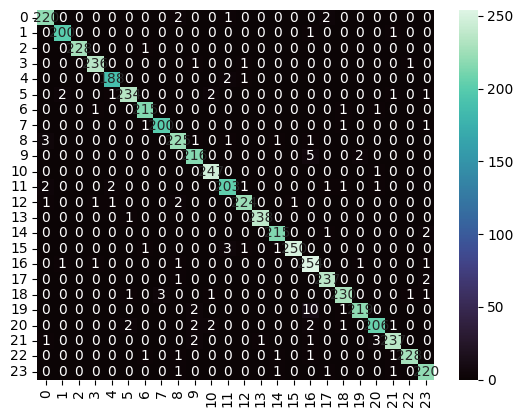

In [143]:
confusion_mat = confusion_matrix(Y_valid, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="mako")

In [86]:
import joblib

In [121]:
model_path = "models/xgb_200_30_001_valid.joblib"

In [122]:
joblib.dump(model, model_path)

['models/xgb_200_30_001_valid.joblib']